# Notebook Dedicated to show the Distributions of the Observables/Features in the Train Dataset

In [1]:
import numpy as np
 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager

import seaborn as sn
import pandas as pd

from sklearn.utils import shuffle

# Load Data

## Define the Data Cuts of the original pd.DataFrame

In [2]:
energy_inf_cut = 2.5
energy_sup_cut = 12

posr_cut = 5500

time_res_inf_cut = -1
time_res_sup_cut = 5

nhits_cut = 20

n_bins_cos = 12
n_bins_time = 12

In [3]:
#Directories
train_dataset_dir = "E:/Data/solars/mc/ML Data/pd_dataframe/1D Histograms/Train/"
train_dataset_fname = f'df_cos_{n_bins_cos}_time_{n_bins_time}_bins_E_{energy_inf_cut}_{energy_sup_cut}_MeV_R_{posr_cut}_mm_Delta_{time_res_inf_cut}_{time_res_sup_cut}_ns.csv'

#Load in Pandas  DataFrame
df_train = shuffle(pd.read_csv(train_dataset_dir + train_dataset_fname))

In [4]:
df_train.describe()

,cos_0,cos_1,cos_2,cos_3,cos_4,cos_5,cos_6,cos_7,cos_8,cos_9,...,chi_sqrt_bkg,jsd_sig,jsd_bkg,emd_sig,emd_bkg,energy (MeV),radius (mm),nhits,IsNu,IsTl
count,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,...,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06,1.502813e+06
mean,1.072412e+01,1.069690e+01,1.052237e+01,1.035581e+01,1.037639e+01,1.028084e+01,1.035724e+01,1.042671e+01,1.052552e+01,1.062043e+01,...,8.041031e-01,1.006036e-01,1.001235e-01,3.550559e-01,3.528048e-01,4.661723e+00,4.096745e+03,1.257121e+02,6.572734e-01,3.427266e-01
std,1.787176e+01,1.297819e+01,1.055255e+01,9.182380e+00,8.441184e+00,8.057143e+00,8.054549e+00,8.357241e+00,9.163633e+00,1.071582e+01,...,7.150114e-01,6.176662e-02,6.423550e-02,1.834905e-01,1.860564e-01,1.753361e+00,1.072686e+03,5.465191e+01,4.746211e-01,4.746211e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.837582e-02,1.899016e-03,2.243835e-03,1.111793e-02,1.282913e-02,2.500002e+00,3.176235e+01,2.000000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,...,3.414201e-01,5.377856e-02,5.076882e-02,1.985818e-01,1.926671e-01,3.457328e+00,3.424745e+03,8.600000e+01,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.000000e+00,7.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,...,5.511694e-01,8.468341e-02,8.248405e-02,3.254062e-01,3.246557e-01,4.015488e+00,4.333659e+03,1.160000e+02,1.000000e+00,0.000000e+00
75%,1.200000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.500000e+01,1.500000e+01,...,1.001110e+00,1.355080e-01,1.369698e-01,4.996635e-01,4.996529e-01,5.501708e+00,4.976263e+03,1.530000e+02,1.000000e+00,1.000000e+00
max,2.240000e+02,1.110000e+02,9.100000e+01,8.200000e+01,7.900000e+01,7.400000e+01,7.500000e+01,7.800000e+01,8.100000e+01,9.300000e+01,...,8.296711e+00,4.355173e-01,4.399689e-01,8.672494e-01,8.661090e-01,1.199876e+01,5.500000e+03,4.300000e+02,1.000000e+00,1.000000e+00


## Apply cuts to the Dataset

In [5]:
energy_cut = 5
radial_cut = 4500

condition = (df_train['energy (MeV)'] <= energy_cut) & (df_train['radius (mm)'] <= radial_cut)

df_train = df_train[condition]

## Separate signal from background

In [6]:
df_train_sig = df_train[df_train['IsNu'] == 1]
df_train_bkg = df_train[df_train['IsTl'] == 1]

## Extract Features
Create a Dictionary whose keys are the features

In [8]:
features_list = df_train.columns
features_list

Index(['cos_0', 'cos_1', 'cos_2', 'cos_3', 'cos_4', 'cos_5', 'cos_6', 'cos_7',
       'cos_8', 'cos_9', 'cos_10', 'cos_11', 'time_0', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'time_9',
       'time_10', 'time_11', 'cos_peak', 'time_peak', 'cos_mean_val',
       'time_mean_val', 'cos_variance', 'time_variance', 'cos_skewness',
       'time_skewness', 'cos_kurtosis', 'time_kurtosis', 'cos_entropy',
       'time_entropy', 'chi_sqrt_sig', 'chi_sqrt_bkg', 'jsd_sig', 'jsd_bkg',
       'emd_sig', 'emd_bkg', 'energy (MeV)', 'radius (mm)', 'nhits', 'IsNu',
       'IsTl'],
      dtype='object')

In [9]:
features_list = df_train.columns
features_list

Index(['cos_0', 'cos_1', 'cos_2', 'cos_3', 'cos_4', 'cos_5', 'cos_6', 'cos_7',
       'cos_8', 'cos_9', 'cos_10', 'cos_11', 'time_0', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'time_9',
       'time_10', 'time_11', 'cos_peak', 'time_peak', 'cos_mean_val',
       'time_mean_val', 'cos_variance', 'time_variance', 'cos_skewness',
       'time_skewness', 'cos_kurtosis', 'time_kurtosis', 'cos_entropy',
       'time_entropy', 'chi_sqrt_sig', 'chi_sqrt_bkg', 'jsd_sig', 'jsd_bkg',
       'emd_sig', 'emd_bkg', 'energy (MeV)', 'radius (mm)', 'nhits', 'IsNu',
       'IsTl'],
      dtype='object')

In [10]:
feature_dict_sig = {feat_i : np.array(df_train_sig[feat_i]) for feat_i in features_list}
feature_dict_bkg = {feat_i : np.array(df_train_bkg[feat_i]) for feat_i in features_list}

# Features Plots: Signal vs. Background

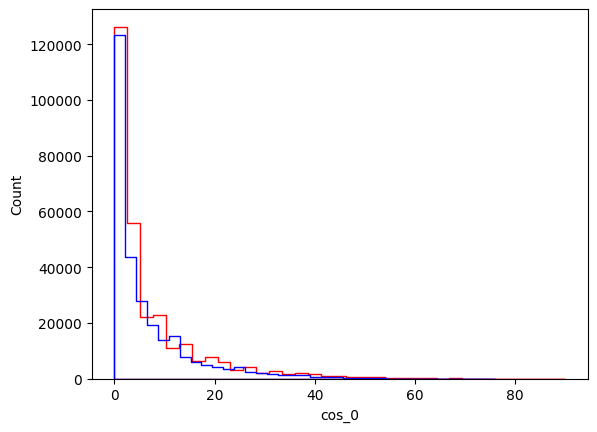

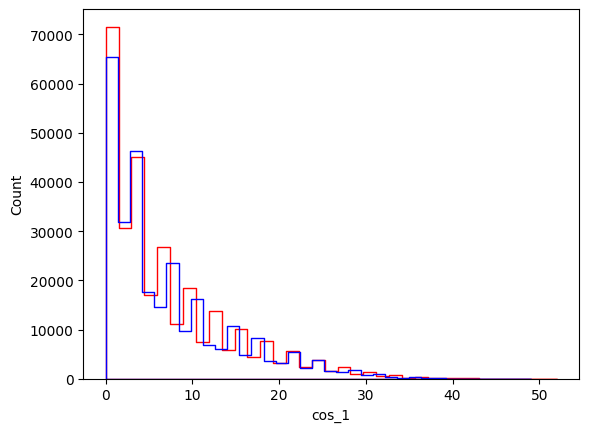

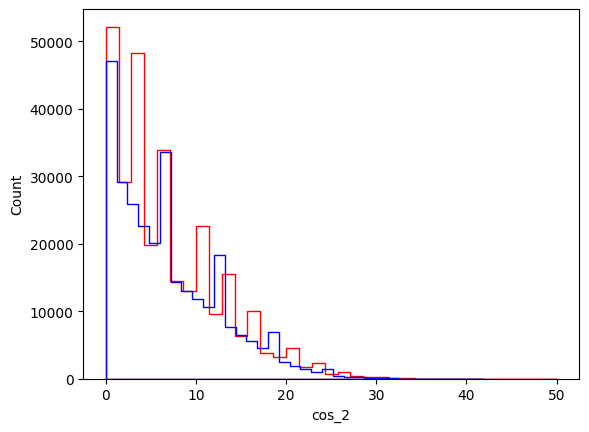

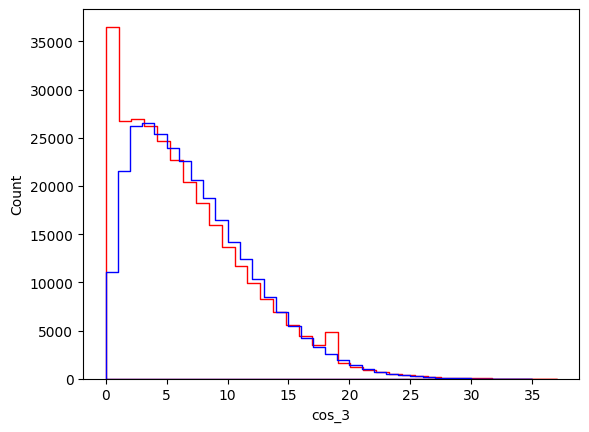

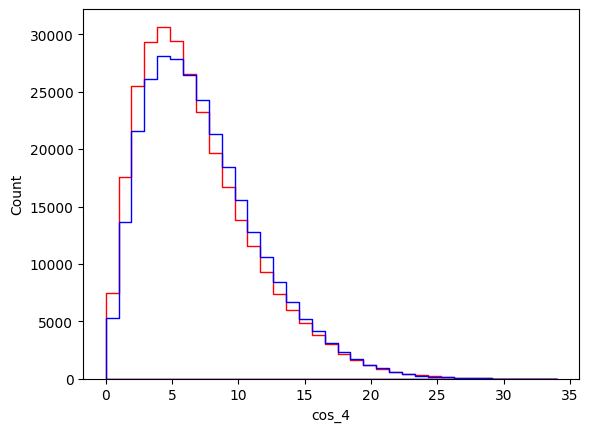

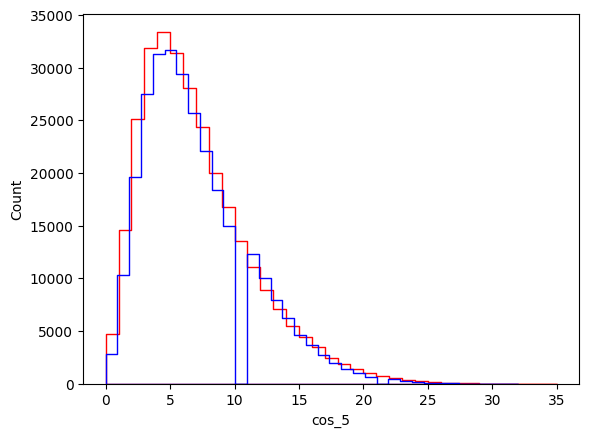

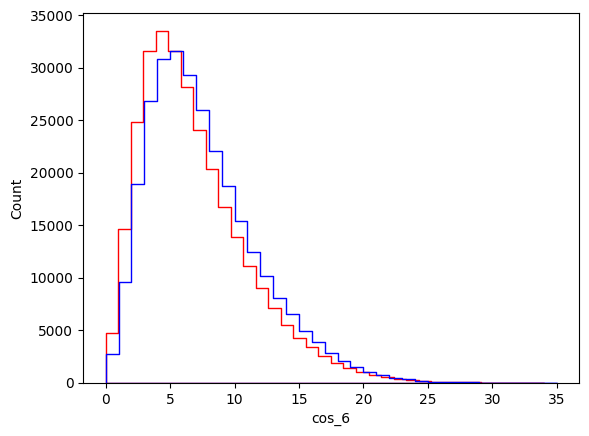

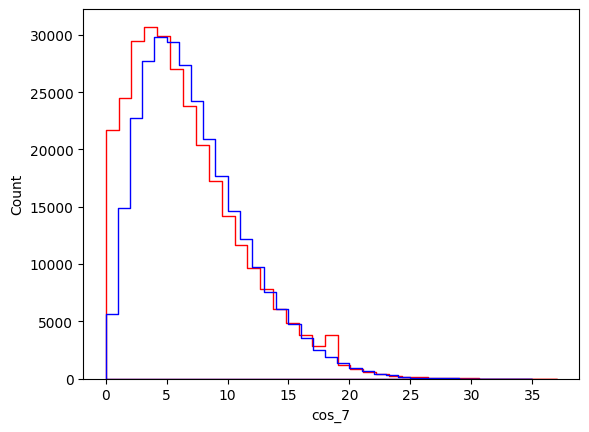

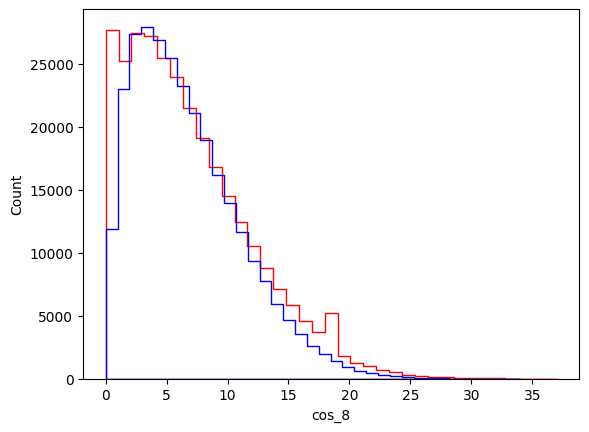

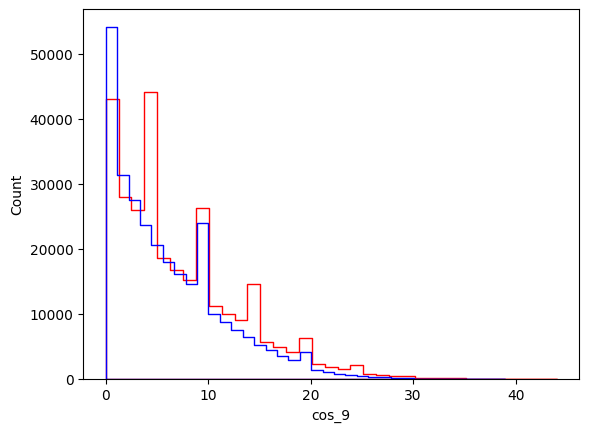

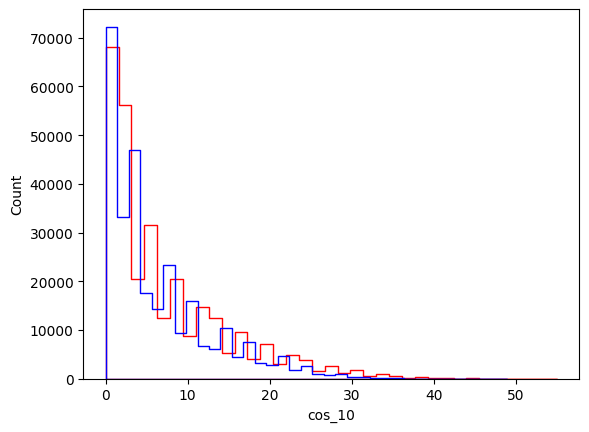

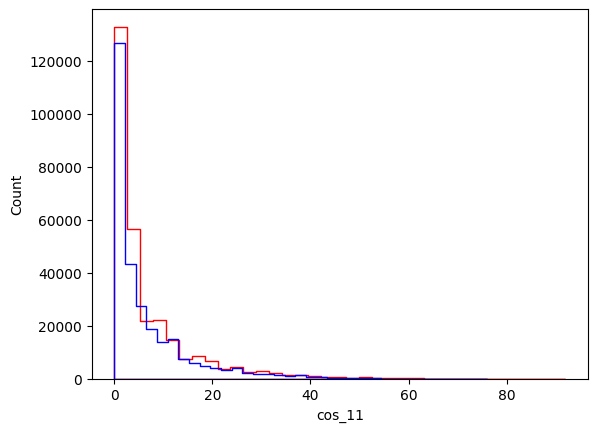

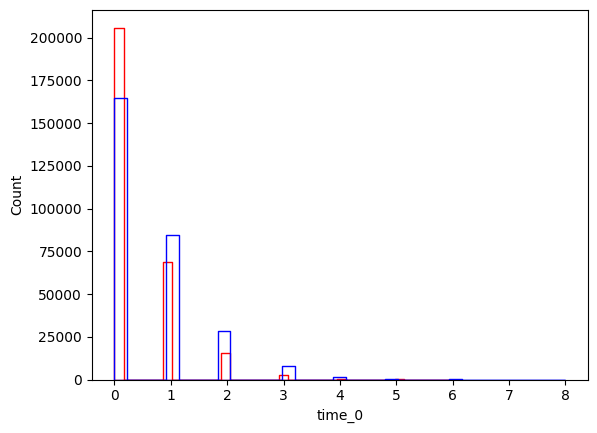

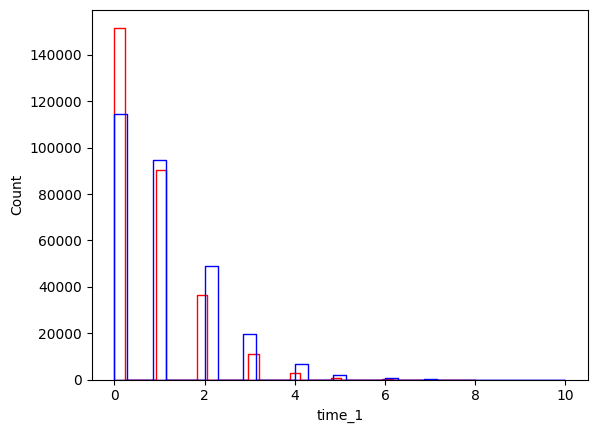

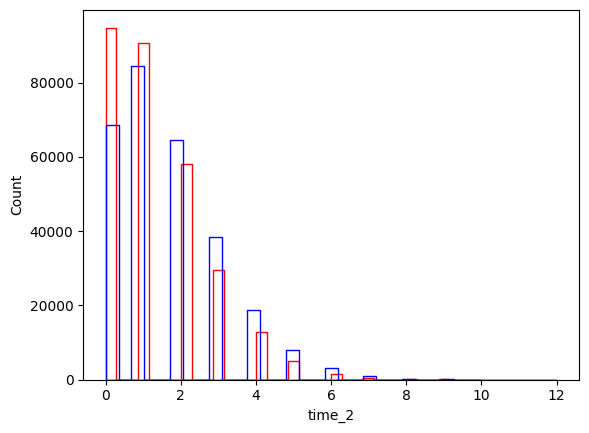

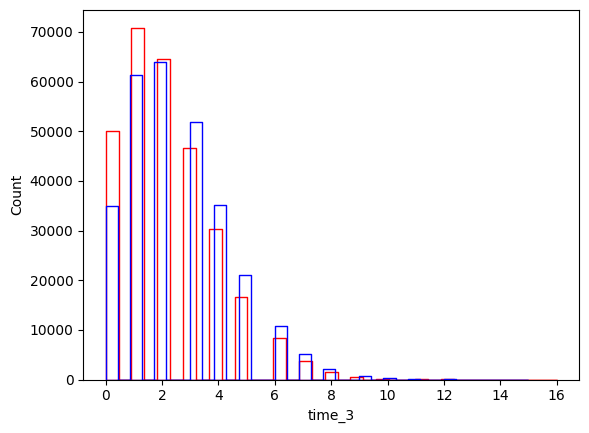

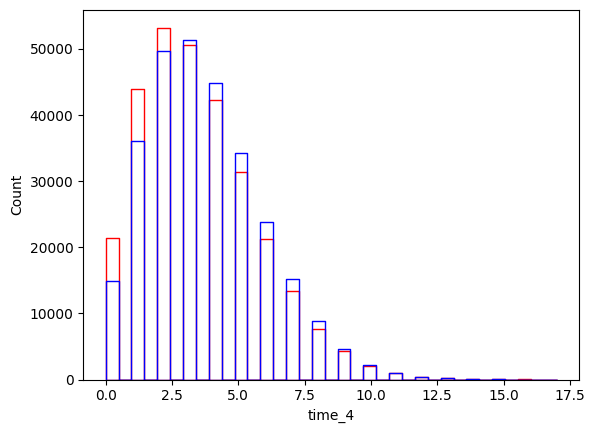

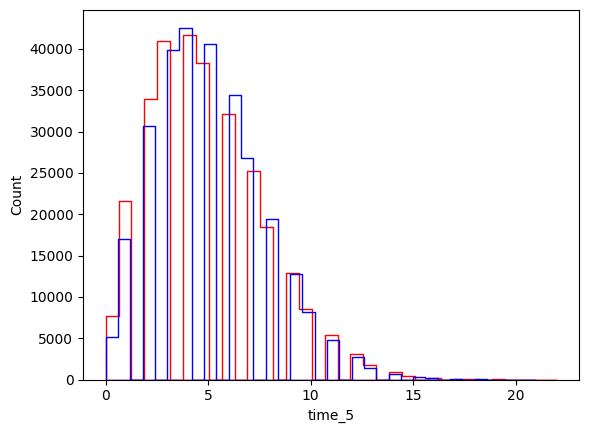

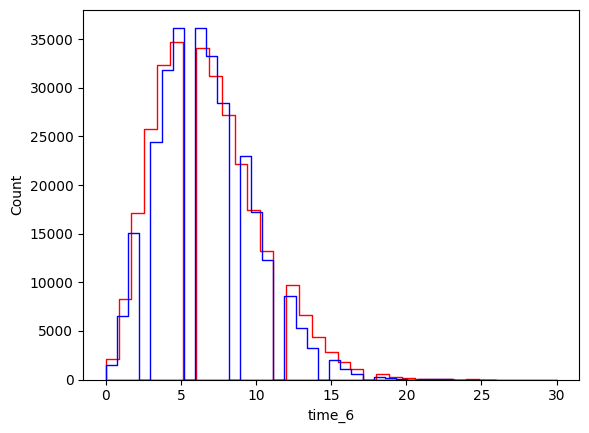

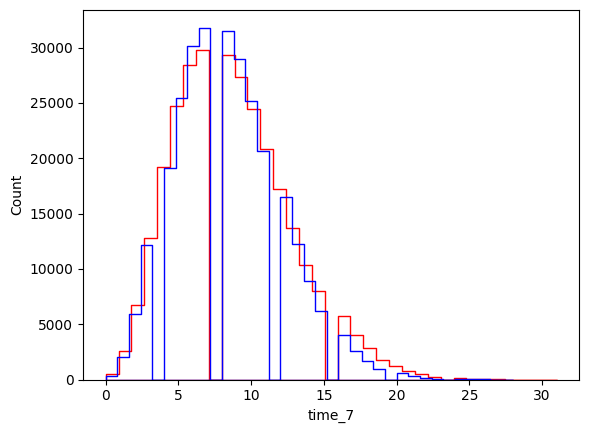

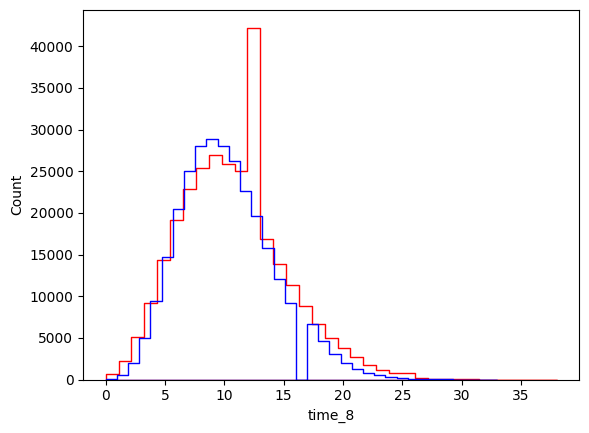

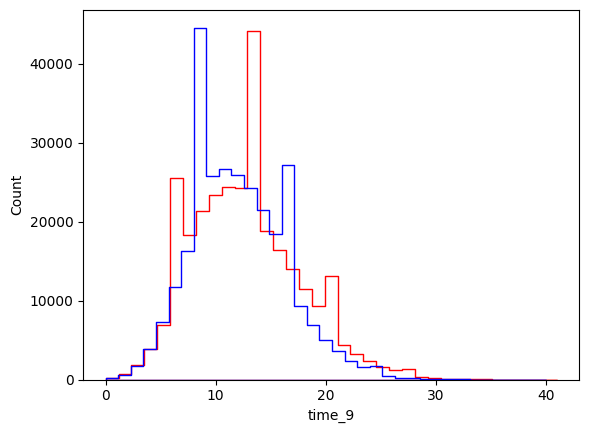

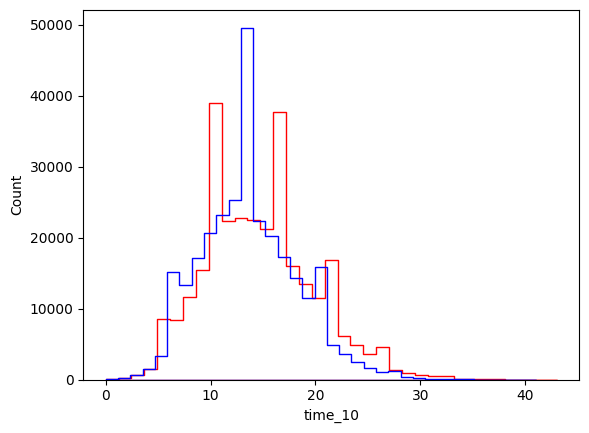

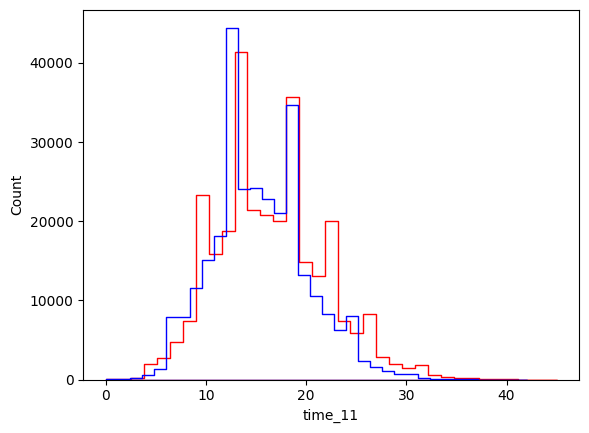

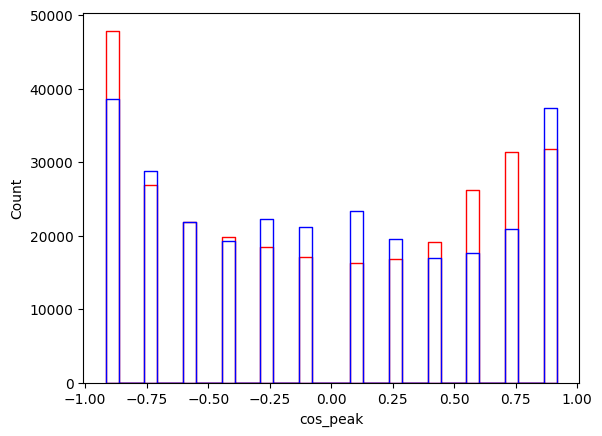

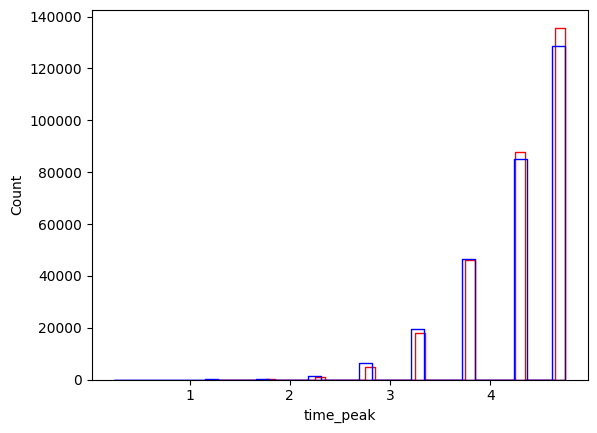

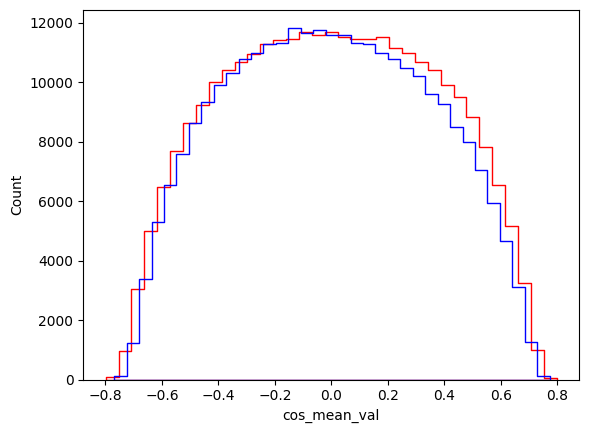

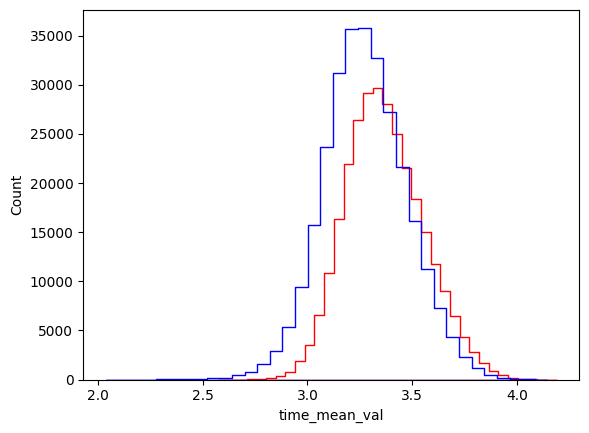

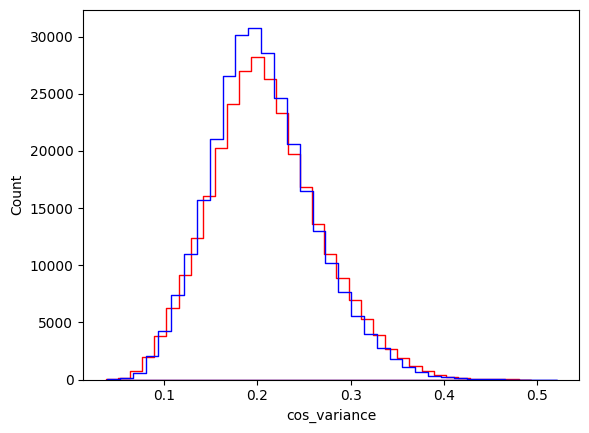

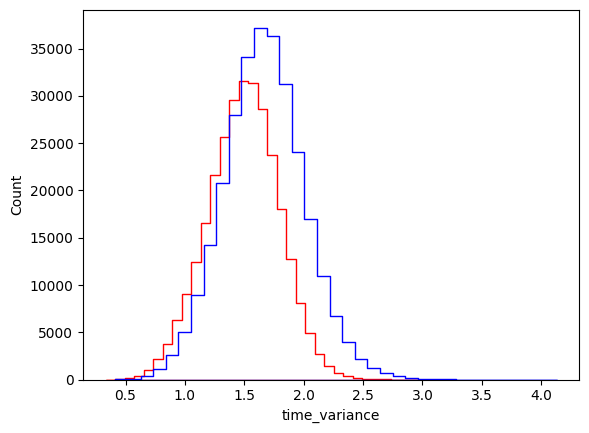

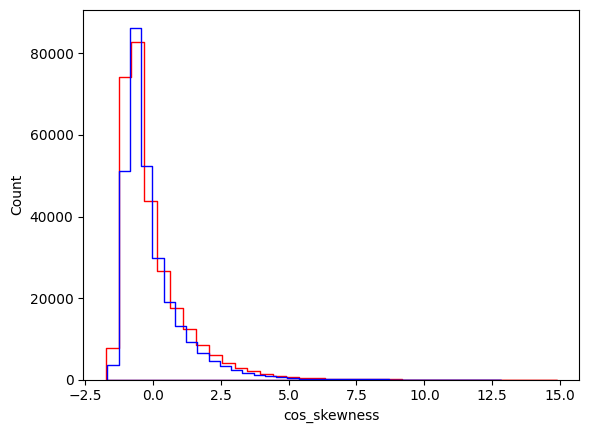

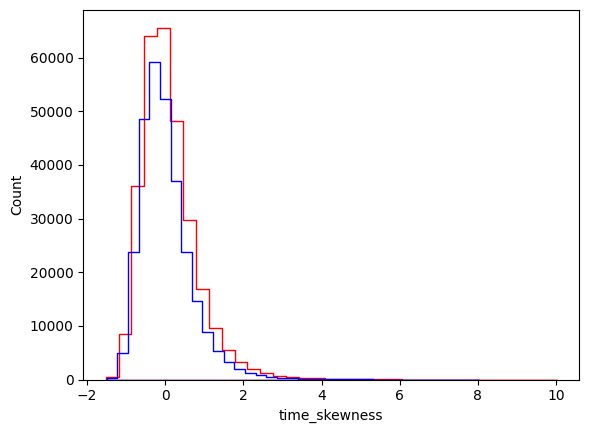

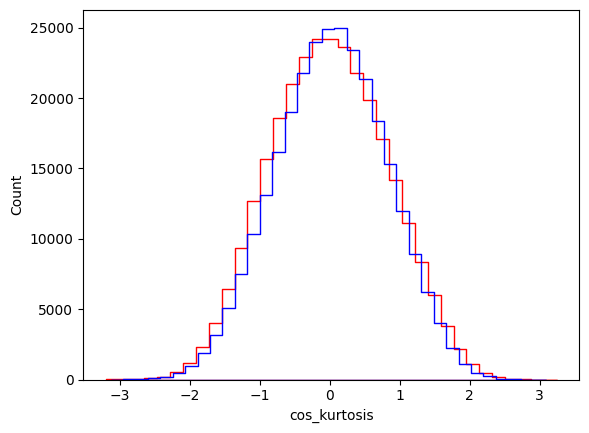

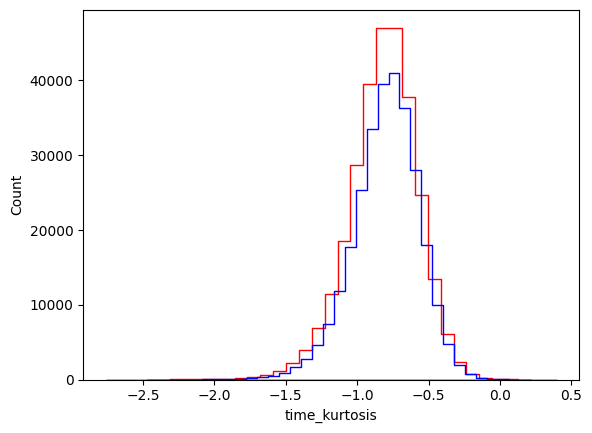

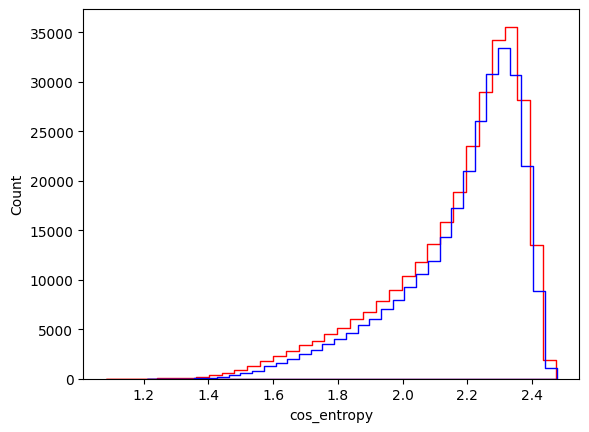

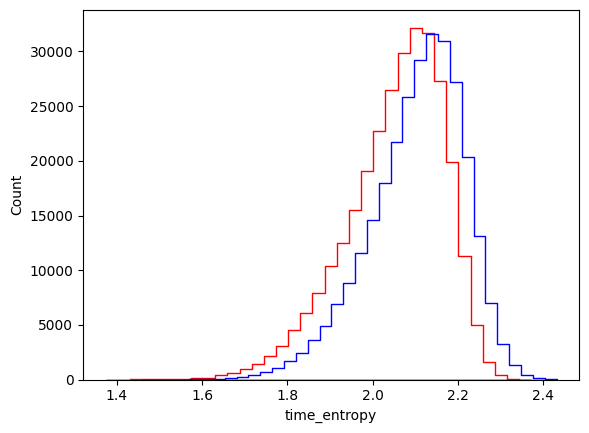

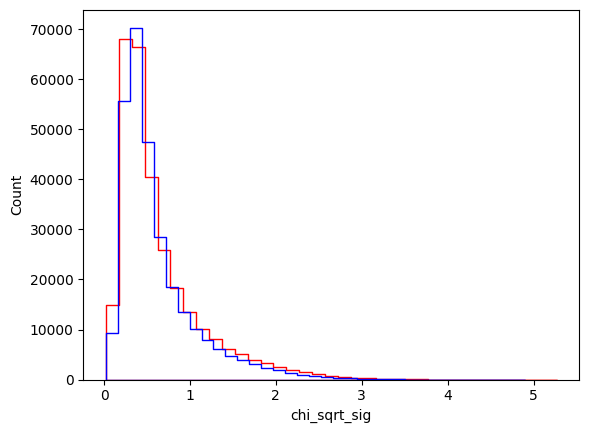

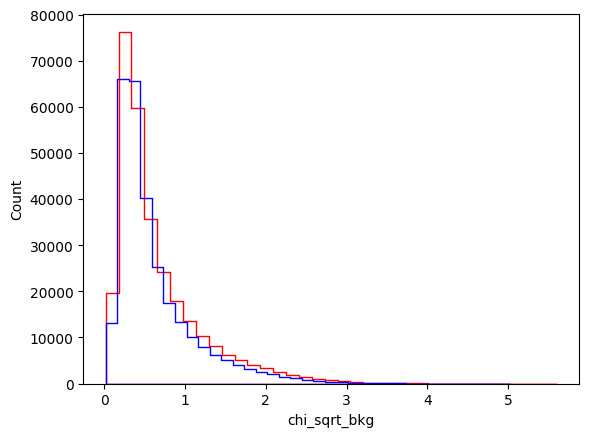

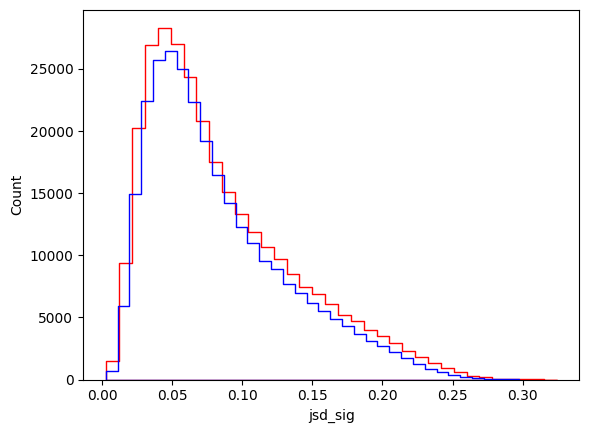

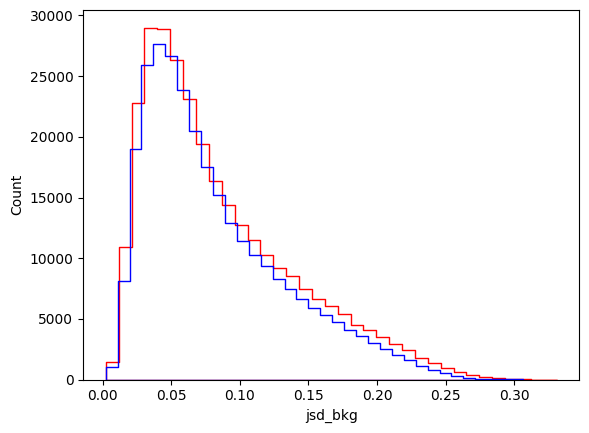

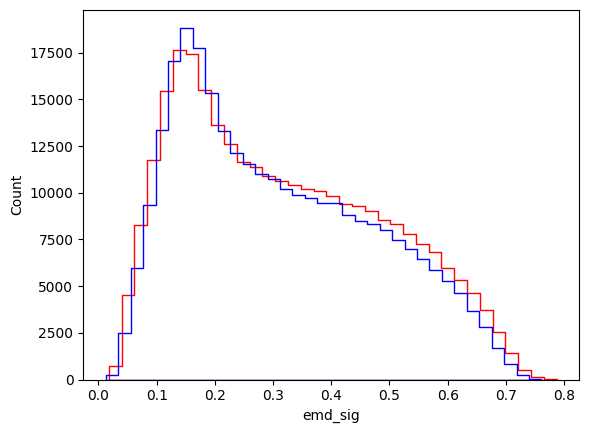

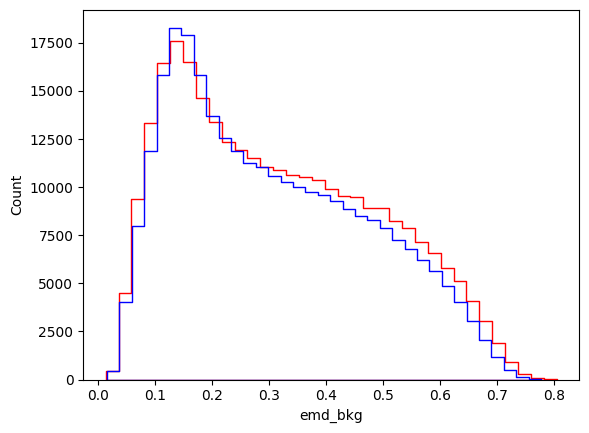

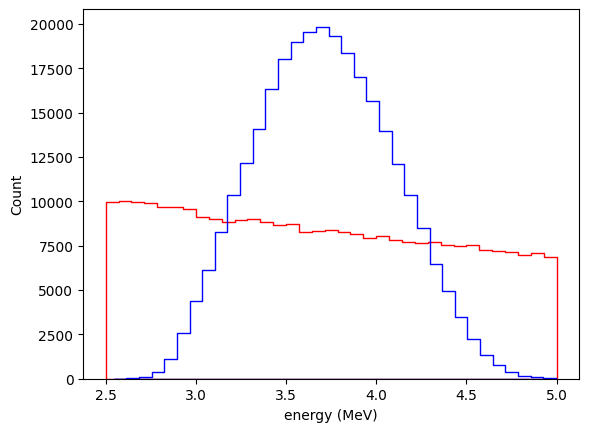

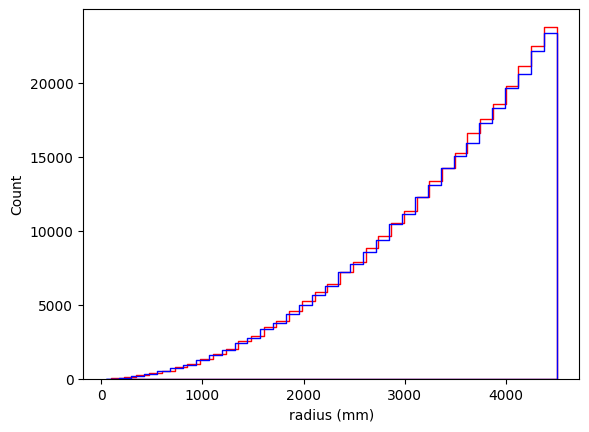

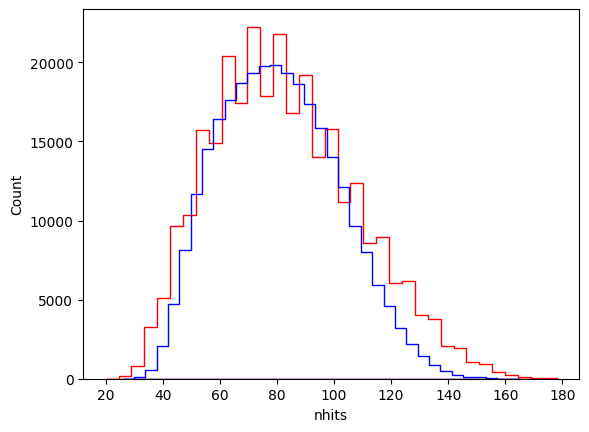

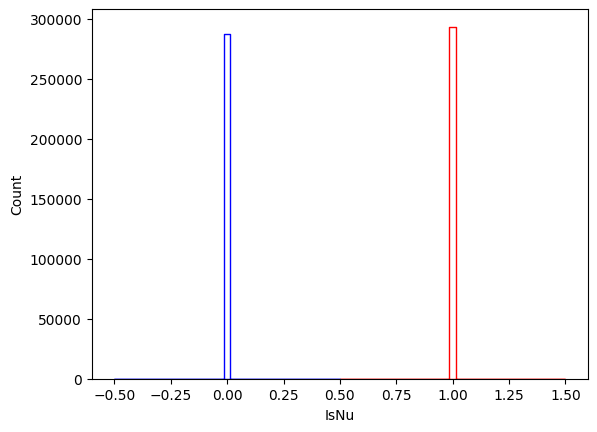

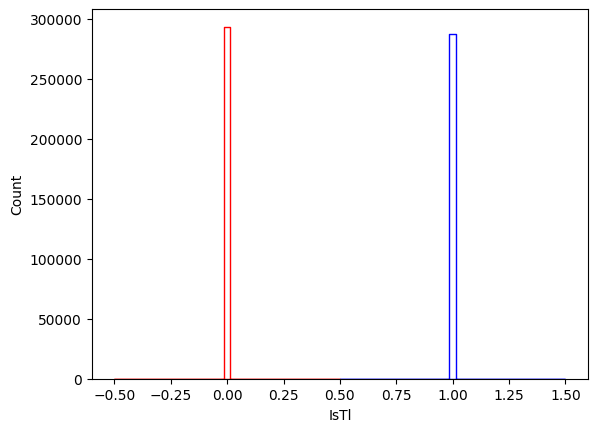

In [11]:
bins = 35
N_features = len(features_list)

for feature_i in features_list:
    
    sn.histplot(feature_dict_sig[feature_i], bins = bins, element = 'step', alpha = 0, color = 'r')
    sn.histplot(feature_dict_bkg[feature_i], bins = bins, element = 'step', alpha = 0, color = 'b')

    plt.xlabel(feature_i)
    plt.show()